### Loan Analysis

此數據包含客戶的還款情況以及客戶的收入、信用紀錄、借款用途與其他個人信息。<br>
還款情況分別為已清償(Fully Paid)及呆帳(Charged Off)。<br>
分析目標為利用現有的客戶資料建立預測模型評估客戶的還款情形。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [2]:
raw_data = pd.read_csv('Kaggle_credit.csv')
raw_data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = raw_data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


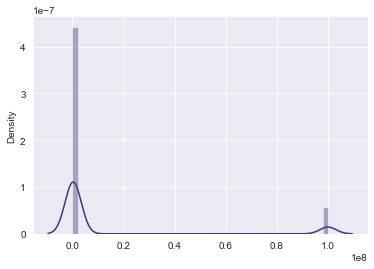

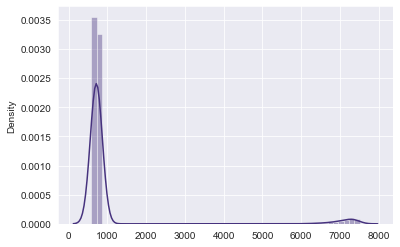

In [6]:
sns.set_style('darkgrid')
sns.set_palette('viridis')
sns.distplot(x = df['Current Loan Amount'])
plt.show()
sns.distplot(x = df['Credit Score'])
plt.show()

[Current Loan Amount]及[Credit Score]有資料誤植的情形。

#### Remove NaN, Duplicate and Typing errors

In [7]:
print(df.isnull().sum()[df.isnull().sum()>0])
print('\n')
print('Duplicate Data:', df.duplicated().sum())

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


Duplicate Data: 10728


In [8]:
df = df.dropna(axis=0, how='all')
df = df.drop_duplicates()
print(df.isnull().sum()[df.isnull().sum()>0])
print('\n')
print('Duplicate Data:', df.duplicated().sum())

Credit Score                    19154
Annual Income                   19154
Years in current job             3802
Months since last delinquent    48337
Maximum Open Credit                 2
Bankruptcies                      190
Tax Liens                           9
dtype: int64


Duplicate Data: 0


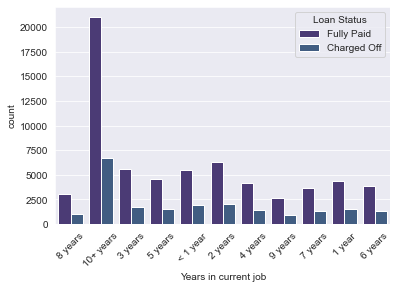

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [9]:
sns.countplot(x = df['Years in current job'], hue = df['Loan Status'])
plt.xticks(rotation = 45)
plt.show()
df['Years in current job'].unique()

In [10]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mode()[0])
df.isnull().sum()[df.isnull().sum()>0]

Credit Score                    19154
Annual Income                   19154
Months since last delinquent    48337
Maximum Open Credit                 2
Bankruptcies                      190
Tax Liens                           9
dtype: int64

In [11]:
df.drop(['Months since last delinquent'], axis = 1, inplace = True)
df.isnull().sum()[df.isnull().sum()>0]

Credit Score           19154
Annual Income          19154
Maximum Open Credit        2
Bankruptcies             190
Tax Liens                  9
dtype: int64

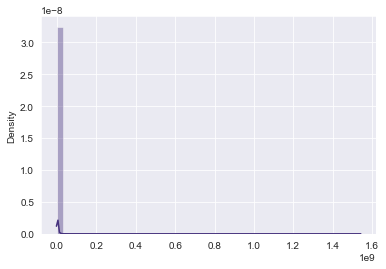

In [12]:
sns.distplot(x = df['Maximum Open Credit'])
plt.show()

In [13]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mode()[0])
df.isnull().sum()[df.isnull().sum()>0]

Credit Score     19154
Annual Income    19154
Bankruptcies       190
Tax Liens            9
dtype: int64

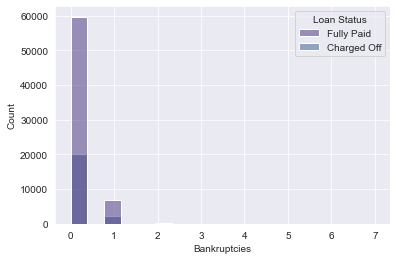

In [14]:
sns.histplot(x = df['Bankruptcies'], hue = df['Loan Status'])
plt.show()

In [15]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
df.isnull().sum()[df.isnull().sum()>0]

Credit Score     19154
Annual Income    19154
Tax Liens            9
dtype: int64

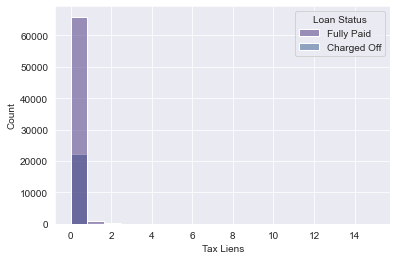

In [16]:
sns.histplot(x = df['Tax Liens'], hue = df['Loan Status'])
plt.show()

In [17]:
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mode()[0])
df.isnull().sum()[df.isnull().sum()>0]

Credit Score     19154
Annual Income    19154
dtype: int64

In [18]:
display(df[df['Loan ID'].duplicated()])

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.00,Long Term,689.00,866799.00,9 years,Home Mortgage,Debt Consolidation,3676.69,14.10,4.00,2.00,86051.00,167750.00,2.00,0.00
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,717.00,1765290.00,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,16.00,1.00,446329.00,891022.00,1.00,0.00
2020,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.00,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,5948.71,9.00,10.00,1.00,59888.00,372746.00,1.00,0.00
2268,35e2f286-1c14-4892-8ddf-cd9c397f84a4,75b6f4dd-b3c6-4220-969f-54c372c22e1f,Fully Paid,65714.00,Short Term,721.00,662074.00,4 years,Rent,Other,1704.87,14.90,3.00,0.00,33250.00,120340.00,0.00,0.00
2680,3b990bb6-440c-43ee-9ef1-4e303b5447dd,8ce9f4e4-0044-4779-a4c5-66552927d0ab,Fully Paid,270556.00,Short Term,NaN,NaN,10+ years,Own Home,Home Improvements,24095.61,23.50,7.00,0.00,286387.00,908490.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,Fully Paid,431860.00,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.50,5.00,0.00,241319.00,476806.00,0.00,0.00
99979,2e7e2e3b-db0b-418d-aae8-33991bb2a503,52aa2f3b-3385-42fe-8aaa-57abace6d762,Fully Paid,766392.00,Short Term,717.00,1891070.00,7 years,Home Mortgage,Debt Consolidation,41130.82,15.40,20.00,1.00,604485.00,969430.00,1.00,0.00
99985,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,Fully Paid,179454.00,Short Term,708.00,1356068.00,4 years,Home Mortgage,Debt Consolidation,22318.54,22.70,25.00,0.00,387410.00,1705616.00,0.00,0.00
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.00,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.30,9.00,0.00,87875.00,239404.00,0.00,0.00


In [19]:
df[(df['Loan ID'] == '66a1c384-c294-4612-9705-d79aa95cf6bd') | (df['Loan ID'] == '6b9fdc83-4696-479c-8ab1-cc35e2233cd8')]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
625,6b9fdc83-4696-479c-8ab1-cc35e2233cd8,4bfbef83-43cb-4f97-83d8-b8fe05fd4a57,Fully Paid,347996.00,Long Term,700.00,686945.00,1 year,Own Home,Debt Consolidation,3932.81,11.00,7.00,0.00,164578.00,227678.00,0.00,0.00
2706,6b9fdc83-4696-479c-8ab1-cc35e2233cd8,4bfbef83-43cb-4f97-83d8-b8fe05fd4a57,Fully Paid,99999999.00,Long Term,700.00,686945.00,1 year,Own Home,Debt Consolidation,3932.81,11.00,7.00,0.00,164578.00,227678.00,0.00,0.00
38717,66a1c384-c294-4612-9705-d79aa95cf6bd,aa7f092f-d864-488a-95e5-32a6335b482a,Fully Paid,99999999.00,Long Term,704.00,2041740.00,5 years,Rent,other,32684.94,16.70,9.00,0.00,120612.00,234322.00,0.00,0.00
99972,66a1c384-c294-4612-9705-d79aa95cf6bd,aa7f092f-d864-488a-95e5-32a6335b482a,Fully Paid,328350.00,Long Term,704.00,2041740.00,5 years,Rent,other,32684.94,16.70,9.00,0.00,120612.00,234322.00,0.00,0.00


有7786筆重複資料的[Current Loan Amount]誤植成99999999。

In [20]:
df = df.drop(df[df['Current Loan Amount'] == 99999999].index, axis = 0)
print('Duplicate of Loan ID :', df['Loan ID'].duplicated().sum())

Duplicate of Loan ID : 4207


In [21]:
display(df[df['Loan ID'].duplicated()])

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,717.00,1765290.00,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,16.00,1.00,446329.00,891022.00,1.00,0.00
2020,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.00,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,5948.71,9.00,10.00,1.00,59888.00,372746.00,1.00,0.00
2268,35e2f286-1c14-4892-8ddf-cd9c397f84a4,75b6f4dd-b3c6-4220-969f-54c372c22e1f,Fully Paid,65714.00,Short Term,721.00,662074.00,4 years,Rent,Other,1704.87,14.90,3.00,0.00,33250.00,120340.00,0.00,0.00
2680,3b990bb6-440c-43ee-9ef1-4e303b5447dd,8ce9f4e4-0044-4779-a4c5-66552927d0ab,Fully Paid,270556.00,Short Term,NaN,NaN,10+ years,Own Home,Home Improvements,24095.61,23.50,7.00,0.00,286387.00,908490.00,0.00,0.00
2893,e8f5ca19-f3f7-487f-aba7-26c0b600a7a3,69f7f1af-4464-4d8b-8c41-17d15b7b5e4d,Fully Paid,756756.00,Long Term,689.00,1786836.00,10+ years,Rent,Debt Consolidation,30674.17,19.90,11.00,0.00,851789.00,1397022.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99968,062fe532-8cc0-405f-8d94-c7e658ae0321,b3078951-ad74-4f67-8cba-4832a67fce0b,Fully Paid,177540.00,Short Term,673.00,1387703.00,10+ years,Home Mortgage,Debt Consolidation,22665.86,26.00,21.00,1.00,381273.00,658922.00,1.00,0.00
99977,205e344c-5291-4e26-9f67-499bdc04869f,5cdbc32a-08a5-4f7e-8cb2-f599d39abf57,Fully Paid,483428.00,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,19328.70,15.60,18.00,0.00,440572.00,824142.00,0.00,0.00
99978,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,Fully Paid,431860.00,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.50,5.00,0.00,241319.00,476806.00,0.00,0.00
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.00,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.30,9.00,0.00,87875.00,239404.00,0.00,0.00


In [22]:
df[(df['Loan ID'] == '09997824-a068-4fb6-85dd-3ee8d6c0b532') | (df['Loan ID'] == '4ada45a7-1323-4961-a8b4-45bf1c473bab')]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
206,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.00,Long Term,645.00,825246.00,< 1 year,Rent,Debt Consolidation,5948.71,9.00,10.00,1.00,59888.00,372746.00,1.00,0.00
656,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,16.00,1.00,446329.00,891022.00,1.00,0.00
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,717.00,1765290.00,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,16.00,1.00,446329.00,891022.00,1.00,0.00
2020,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.00,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,5948.71,9.00,10.00,1.00,59888.00,372746.00,1.00,0.00


有4207筆重複資料的[Credit Score]、[Annual Income]為空值。

In [23]:
df = df.drop(df[df['Loan ID'].duplicated(keep = 'first')][df['Credit Score'].isna()].index, axis=0)
df = df.drop(df[df['Loan ID'].duplicated(keep = 'last')][df['Credit Score'].isna()].index, axis=0)
print('Duplicate of Loan ID :', df['Loan ID'].duplicated().sum())

Duplicate of Loan ID : 0


In [24]:
df.isnull().sum()[df.isnull().sum()>0]

Credit Score     14947
Annual Income    14947
dtype: int64

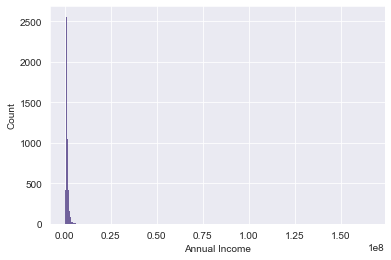

In [25]:
sns.histplot(x = df['Annual Income'])
plt.show()

In [26]:
df['Annual Income'].groupby(df['Loan Status']).median()

Loan Status
Charged Off   1085812.00
Fully Paid    1215734.00
Name: Annual Income, dtype: float64

In [27]:
df['Annual Income'] = np.where((df['Annual Income'].isna()) & (df['Loan Status'] == 'Charged Off'),
                                   df['Annual Income'].groupby(df['Loan Status']).median()[0],
                                   df['Annual Income'])
df['Annual Income'] = np.where((df['Annual Income'].isna()) & (df['Loan Status'] == 'Fully Paid'),
                                   df['Annual Income'].groupby(df['Loan Status']).median()[1],
                                   df['Annual Income'])
df.isnull().sum()[df.isnull().sum()>0]

Credit Score    14947
dtype: int64

In [28]:
pd.DataFrame(df['Credit Score'].describe())

,Credit Score
count,59147.00
mean,1209.48
std,1705.64
min,585.00
25%,707.00
50%,727.00
75%,742.00
max,7510.00


In [29]:
df['Credit Score'][df['Credit Score'] > df['Credit Score'].mean()].sort_values()

73449   5850.00
19823   5850.00
1723    5860.00
85342   5890.00
31362   5900.00
          ...  
76476   7510.00
57290   7510.00
83211   7510.00
27919   7510.00
64774   7510.00
Name: Credit Score, Length: 4551, dtype: float64

在[Credit Score]欄位中有4451筆資料多輸入一個0。

In [30]:
df['Credit Score'] = np.where(df['Credit Score'] > df['Credit Score'].mean(),
                               df['Credit Score'] / 10,
                               df['Credit Score'])

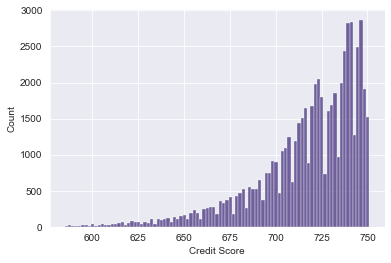

In [31]:
sns.histplot(x = df['Credit Score'])
plt.show()

In [32]:
df['Credit Score'].groupby(df['Loan Status']).median()

Loan Status
Charged Off   719.00
Fully Paid    725.00
Name: Credit Score, dtype: float64

In [33]:
df['Credit Score'] = np.where((df['Credit Score'].isna()) & (df['Loan Status'] == 'Charged Off'),
                               df['Credit Score'].groupby(df['Loan Status']).median()[0],
                               df['Credit Score'])
df['Credit Score'] = np.where((df['Credit Score'].isna()) & (df['Loan Status'] == 'Fully Paid'),
                               df['Credit Score'].groupby(df['Loan Status']).median()[1],
                               df['Credit Score'])

In [34]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
print('Missing value:',df.isna().sum().sum())

Missing value: 0


In [35]:
df1 = df.copy()

#### Category features

In [36]:
df1.drop(['Loan ID','Customer ID'], axis = 1, inplace = True)

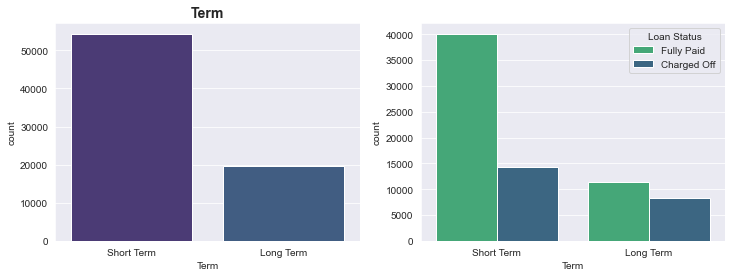

Short Term    54379
Long Term     19715
Name: Term, dtype: int64


In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x = df1['Term'])
plt.title('Term', fontsize = 14, weight = 'bold')
plt.subplot(1,2,2)
sns.countplot(x = df1['Term'], hue = df1['Loan Status'], palette = 'viridis_r')
plt.show()
print(df1['Term'].value_counts())

長期貸款有較高的呆帳率。

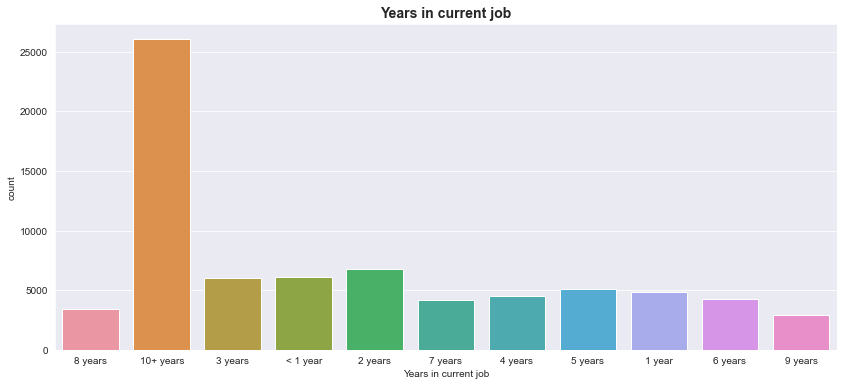

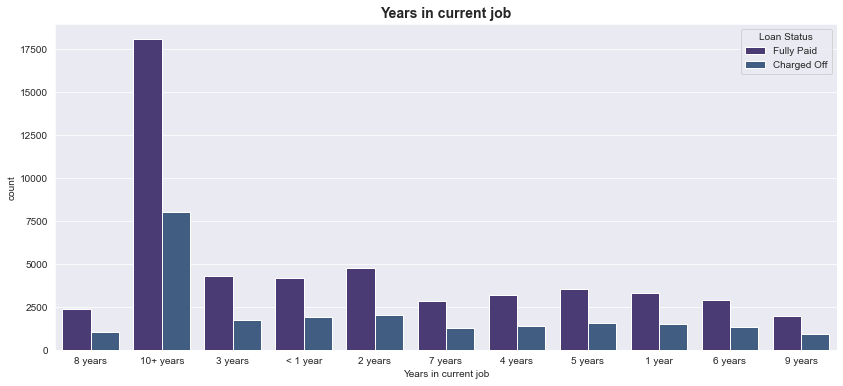

10+ years    26047
2 years       6775
< 1 year      6104
3 years       6020
5 years       5063
1 year        4812
4 years       4542
6 years       4233
7 years       4140
8 years       3432
9 years       2926
Name: Years in current job, dtype: int64


In [38]:
plt.figure(figsize=(14,6))
sns.countplot(x = df1['Years in current job'])
plt.title('Years in current job', fontsize = 14, weight = 'bold')
plt.show()
plt.figure(figsize=(14,6))
sns.countplot(x = df1['Years in current job'], hue = df1['Loan Status'])
plt.title('Years in current job', fontsize = 14, weight = 'bold')
plt.show()
print(df1['Years in current job'].value_counts())

現職工作年數對呆帳的影響較不明顯。

In [39]:
df1['Years in current job'] = df1['Years in current job'].replace(['< 1 year','1 year','2 years'], '<3 years')
df1['Years in current job'] = df1['Years in current job'].replace(['3 years','4 years','5 years'], '3-5 years')
df1['Years in current job'] = df1['Years in current job'].replace(['6 years','7 years','8 years','9 years'],
                                                                  '6-9 years')

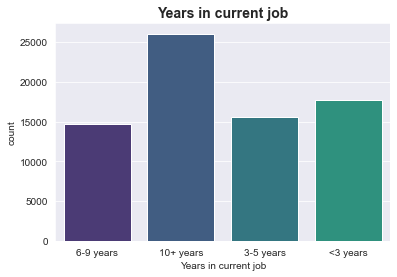

10+ years    26047
<3 years     17691
3-5 years    15625
6-9 years    14731
Name: Years in current job, dtype: int64

In [40]:
sns.countplot(x = df1['Years in current job'])
plt.title('Years in current job', fontsize = 14, weight = 'bold')
plt.show()
df1['Years in current job'].value_counts()

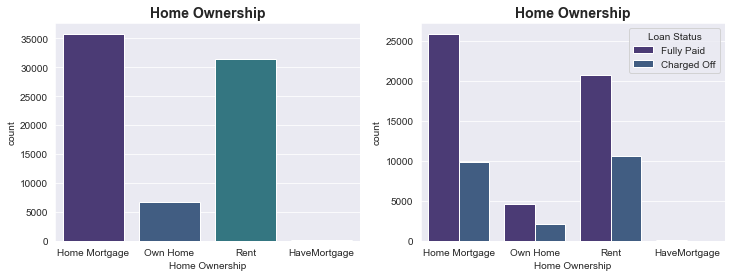

Home Mortgage    35801
Rent             31384
Own Home          6763
HaveMortgage       146
Name: Home Ownership, dtype: int64


In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x = df1['Home Ownership'])
plt.title('Home Ownership', fontsize = 14, weight = 'bold')
plt.subplot(1,2,2)
sns.countplot(x = df1['Home Ownership'], hue = df1['Loan Status'])
plt.title('Home Ownership', fontsize = 14, weight = 'bold')
plt.show()

print(df1['Home Ownership'].value_counts())

租房者有較高呆帳率。

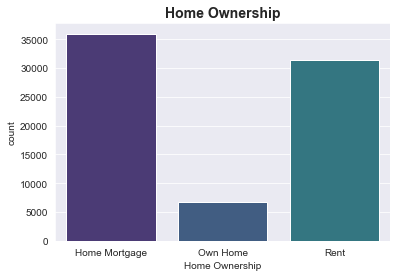

Home Mortgage    35947
Rent             31384
Own Home          6763
Name: Home Ownership, dtype: int64

In [42]:
df1['Home Ownership'].replace('HaveMortgage', 'Home Mortgage', inplace = True)
sns.countplot(x = df1['Home Ownership'])
plt.title('Home Ownership', fontsize = 14, weight = 'bold')
plt.show()
df1['Home Ownership'].value_counts()

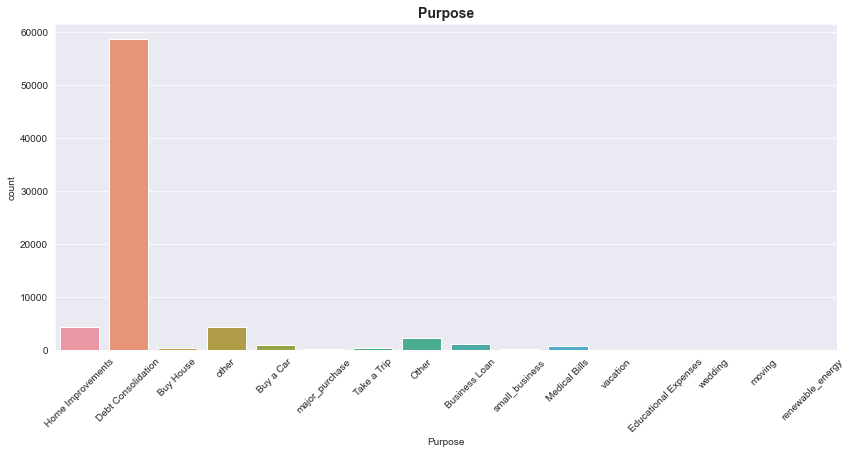

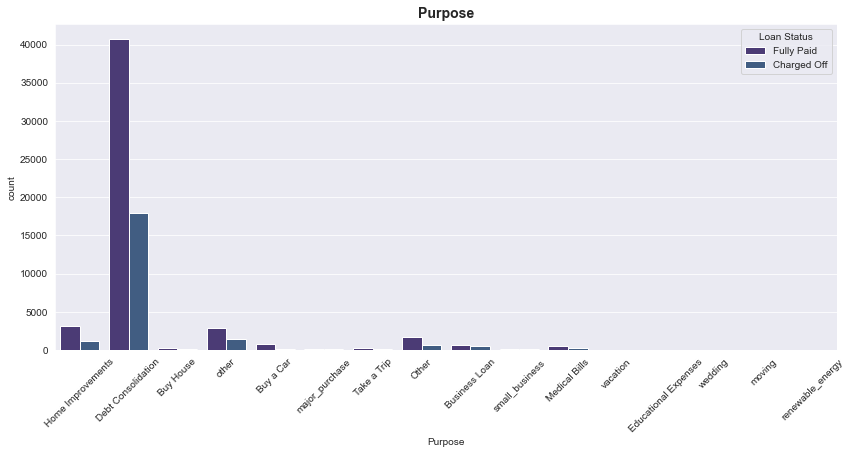

In [43]:
plt.figure(figsize = (14,6))
sns.countplot(x = df1['Purpose'])
plt.title('Purpose', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()
df1['Purpose'].value_counts()

plt.figure(figsize = (14,6))
sns.countplot(x = df1['Purpose'], hue = df1['Loan Status'])
plt.title('Purpose', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

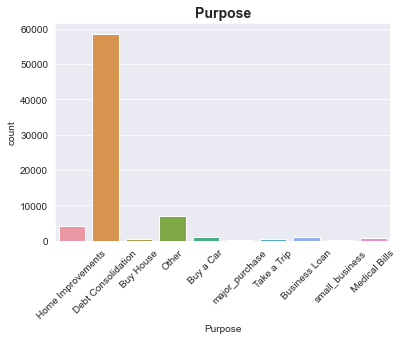

Debt Consolidation    58580
Other                  6975
Home Improvements      4267
Business Loan          1163
Buy a Car               946
Medical Bills           800
Buy House               474
Take a Trip             398
major_purchase          272
small_business          219
Name: Purpose, dtype: int64

In [44]:
df1['Purpose'] = df1['Purpose'].replace(['renewable_energy','vacation','wedding','Educational Expenses',
                                        'moving','other'],'Other')
sns.countplot(x = df1['Purpose'])
plt.title('Purpose', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()
df1['Purpose'].value_counts()

#### Numeric columns

In [45]:
num_col = df1.dtypes[df1.dtypes == float].index.to_list()
num_col

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

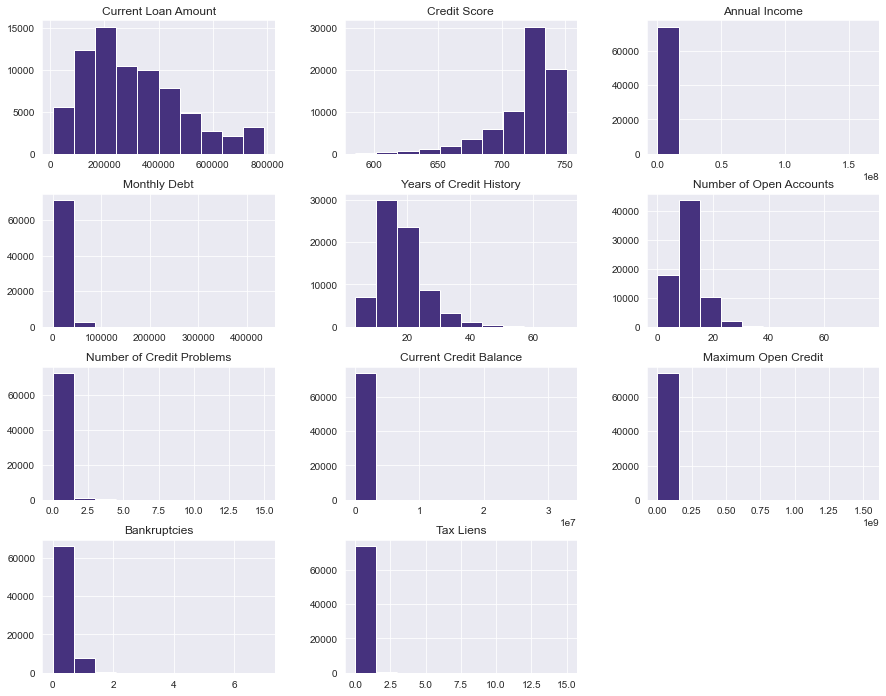

In [46]:
df1[num_col].hist(figsize=(15,12))
plt.ticklabel_format(style='plain')
plt.show()

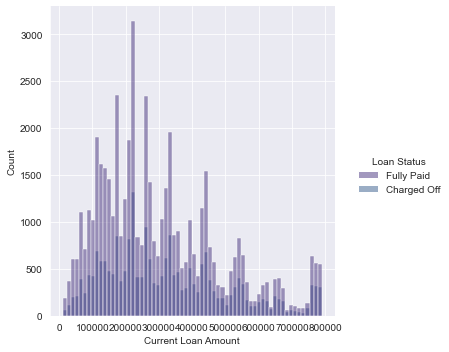

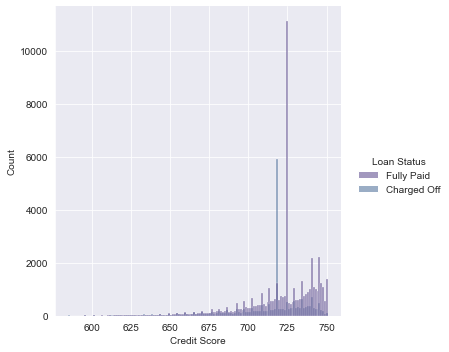

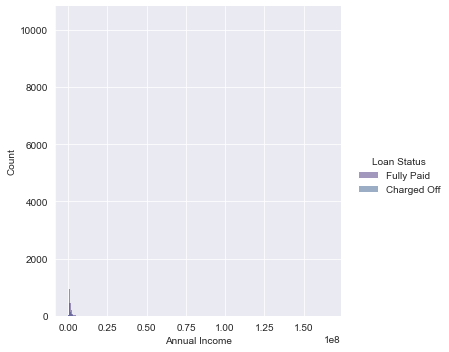

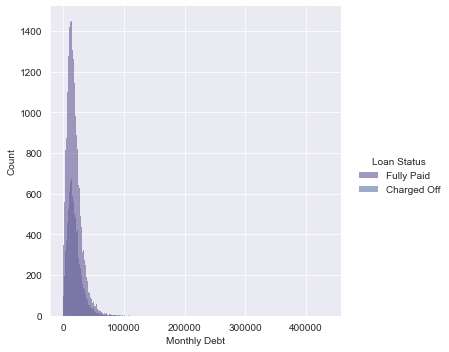

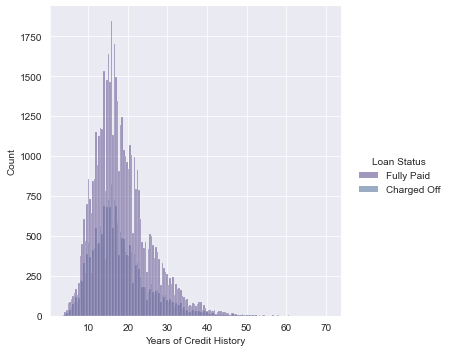

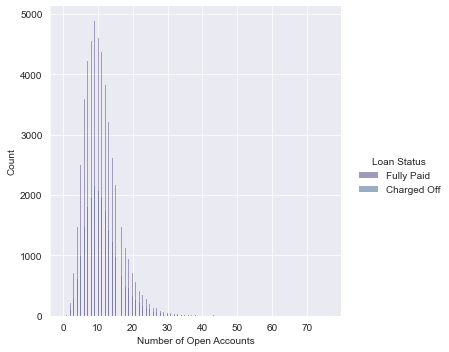

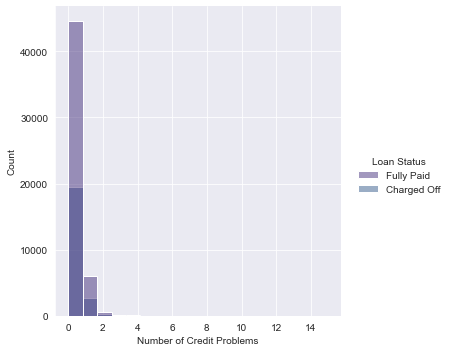

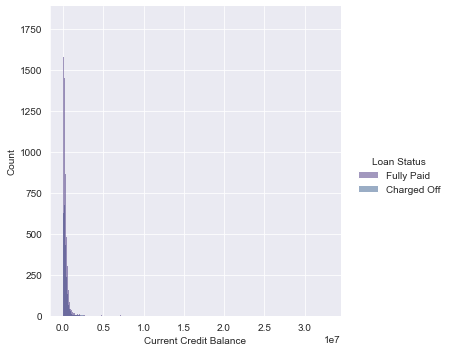

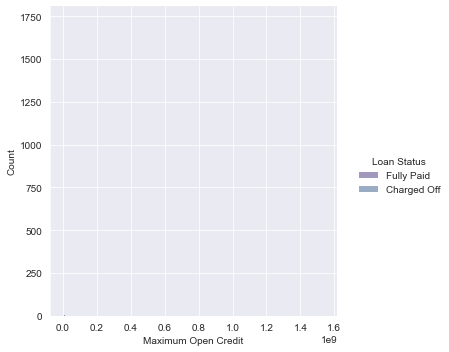

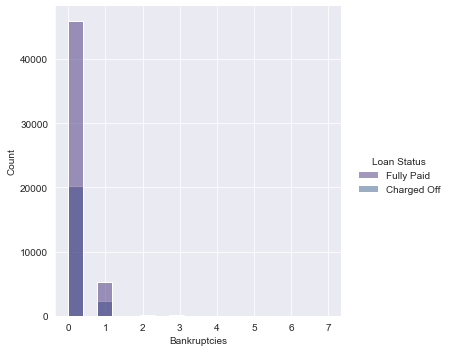

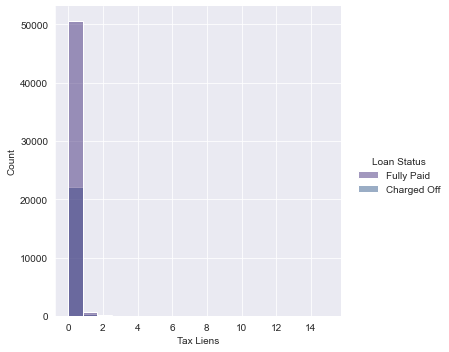

In [47]:
for i in range(len(num_col)):
    sns.displot(x = df1[num_col[i]], hue = df1['Loan Status'])
    plt.show()

在數值資料方面，清償與呆帳的分佈情形大致上相同。

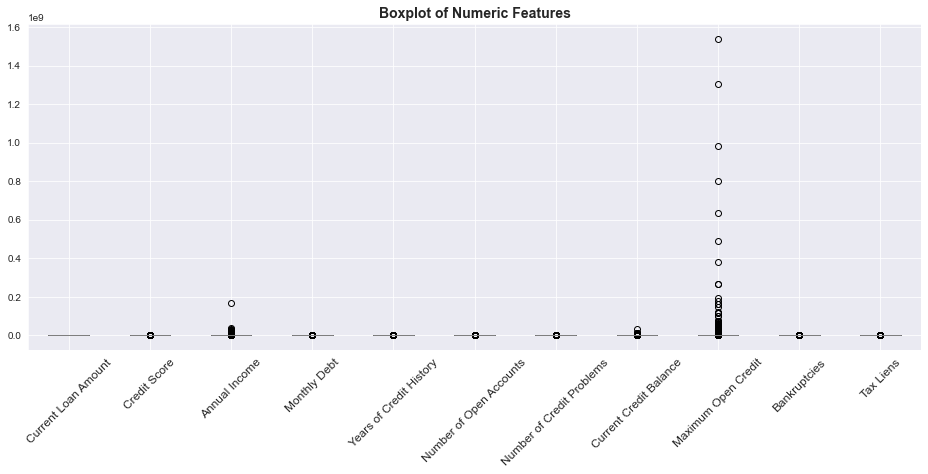

In [48]:
df1[num_col].boxplot(figsize = (16,6))
plt.title('Boxplot of Numeric Features',fontsize = 14, weight = 'bold')
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

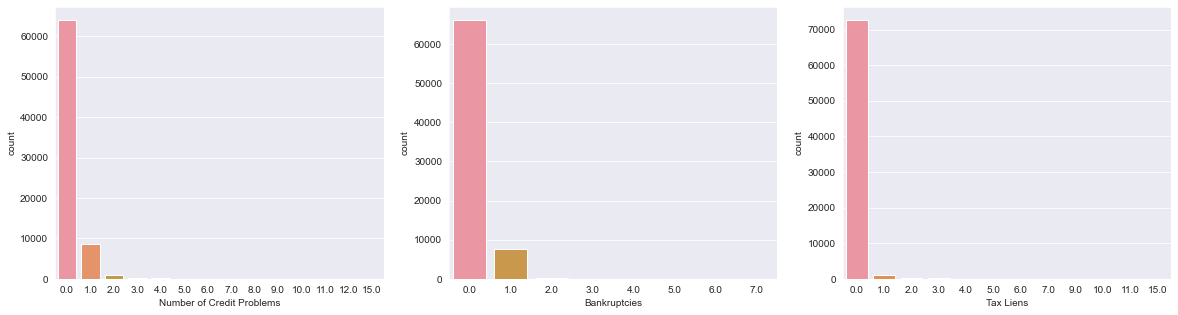

0.00     64032
1.00      8712
2.00       928
3.00       267
4.00        91
5.00        38
6.00        11
7.00         6
10.00        2
8.00         2
9.00         2
11.00        1
15.00        1
12.00        1
Name: Number of Credit Problems, dtype: int64
0.00    66161
1.00     7549
2.00      292
3.00       66
4.00       19
5.00        5
7.00        1
6.00        1
Name: Bankruptcies, dtype: int64
0.00     72703
1.00       966
2.00       264
3.00        85
4.00        46
5.00        12
6.00         7
7.00         5
9.00         3
11.00        1
15.00        1
10.00        1
Name: Tax Liens, dtype: int64


In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x = df1['Number of Credit Problems'])
plt.subplot(1,3,2)
sns.countplot(x = df1['Bankruptcies'])
plt.subplot(1,3,3)
sns.countplot(x = df1['Tax Liens'])
plt.show()
print(df1['Number of Credit Problems'].value_counts())
print(df1['Bankruptcies'].value_counts())
print(df1['Tax Liens'].value_counts())

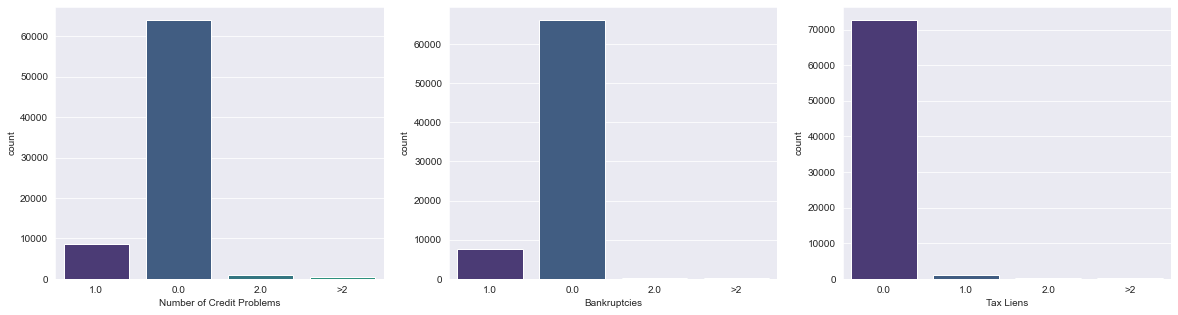

In [50]:
df1['Number of Credit Problems'] = np.where(df1['Number of Credit Problems'] > 2,
                                            '>2',
                                            df1['Number of Credit Problems'])

df1['Bankruptcies'] = np.where(df1['Bankruptcies'] > 2,
                               '>2',
                               df1['Bankruptcies'])

df1['Tax Liens'] = np.where(df1['Tax Liens'] > 2,
                            '>2',
                            df1['Tax Liens'])

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x = df1['Number of Credit Problems'])
plt.subplot(1,3,2)
sns.countplot(x = df1['Bankruptcies'])
plt.subplot(1,3,3)
sns.countplot(x = df1['Tax Liens'])
plt.show()

#### Convert Category Features into Dummy Variables

In [51]:
df1['Loan Status'] = pd.get_dummies(df1['Loan Status'], drop_first = True).values

In [52]:
df1['Long_Term'] = pd.get_dummies(df1['Term'])['Long Term']

In [53]:
df1[['Years_in_Current_Job_3-5','Years_in_Current_Job_6-9','Years_in_Current_Job_<3']] = pd.get_dummies(df1['Years in current job'], drop_first = True)

In [54]:
df1[['HO_Own Home', 'HO_Rent']] = pd.get_dummies(df1['Home Ownership'], drop_first = True)

In [55]:
df1 = pd.concat((df1,pd.get_dummies(df1['Purpose']).drop('Other',axis=1)),axis=1)

In [56]:
df1[['Credit_Problems_1','Credit_Problems_2','Credit_Problems_>2']] = pd.get_dummies(df1['Number of Credit Problems'], drop_first = True)
df1[['Bankruptcies_1','Bankruptcies_2','Bankruptcies_>2']] = pd.get_dummies(df1['Bankruptcies'], drop_first = True)
df1[['Tax_Lien_1','Tax_Lien_2','Tax_Lien_>2']] = pd.get_dummies(df1['Tax Liens'], drop_first = True)

In [57]:
df1 = df1.drop(['Term','Years in current job','Home Ownership','Purpose',
                'Number of Credit Problems','Bankruptcies','Tax Liens'], axis = 1)

In [58]:
df1.columns = ['Loan_Status', 'Current_Loan_Amount', 'Credit_Score', 'Annual_Income',
               'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
               'Current_Credit_Balance', 'Maximum_Open_Credit', 'Long_Term',
               'Years_in_Current_Job_3-5', 'Years_in_Current_Job_6-9',
               'Years_in_Current_Job_<3', 'HO_Own_Home', 'HO_Rent', 'P_Business_Loan',
               'P_Buy_House', 'P_Buy_Car', 'P_Debt_Consolidation', 'P_Home_Improvements',
               'P_Medical_Bills', 'P_Take_a_Trip', 'P_Major_Purchase', 'P_Small_Business',
               'Credit_Problems_1', 'Credit_Problems_2', 'Credit_Problems_>2',
               'Bankruptcies_1', 'Bankruptcies_2', 'Bankruptcies_>2', 'Tax_Lien_1',
               'Tax_Lien_2', 'Tax_Lien_>2']
df1

,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Long_Term,Years_in_Current_Job_3-5,Years_in_Current_Job_6-9,Years_in_Current_Job_<3,HO_Own_Home,HO_Rent,P_Business_Loan,P_Buy_House,P_Buy_Car,P_Debt_Consolidation,P_Home_Improvements,P_Medical_Bills,P_Take_a_Trip,P_Major_Purchase,P_Small_Business,Credit_Problems_1,Credit_Problems_2,Credit_Problems_>2,Bankruptcies_1,Bankruptcies_2,Bankruptcies_>2,Tax_Lien_1,Tax_Lien_2,Tax_Lien_>2
0,1,445412.00,709.00,1167493.00,5214.74,17.20,6.00,228190.00,416746.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,262328.00,725.00,1215734.00,33295.98,21.10,35.00,229976.00,850784.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,347666.00,721.00,806949.00,8741.90,12.00,9.00,256329.00,386958.00,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,206602.00,729.00,896857.00,16367.74,17.30,6.00,215308.00,272448.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,217646.00,730.00,1184194.00,10855.08,19.60,13.00,122170.00,272052.00,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,0,309474.00,719.00,1085812.00,13817.18,26.90,15.00,225872.00,892606.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99989,0,429132.00,719.00,1085812.00,28948.02,16.30,16.00,485279.00,656414.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99994,1,210584.00,719.00,783389.00,3727.61,17.40,6.00,456.00,259160.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99997,1,103136.00,742.00,1150545.00,7315.57,18.80,12.00,109554.00,537548.00,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [59]:
df2 = df1.copy()

#### Remove Outliers

In [60]:
num_col = df2.dtypes[df2.dtypes == float].index.to_list()
num_col

['Current_Loan_Amount',
 'Credit_Score',
 'Annual_Income',
 'Monthly_Debt',
 'Years_of_Credit_History',
 'Number_of_Open_Accounts',
 'Current_Credit_Balance',
 'Maximum_Open_Credit']

In [61]:
def remove_outiler(data,column):
    n = 1.5
    IQR = np.percentile(data[column], 75) - np.percentile(data[column], 25) 
    data = data[data[column] < np.percentile(data[column], 75) + n * IQR]
    data = data[data[column] > np.percentile(data[column], 25) - n * IQR]
    
    return data

In [62]:
for i in num_col:
    df2 = remove_outiler(df2,i)

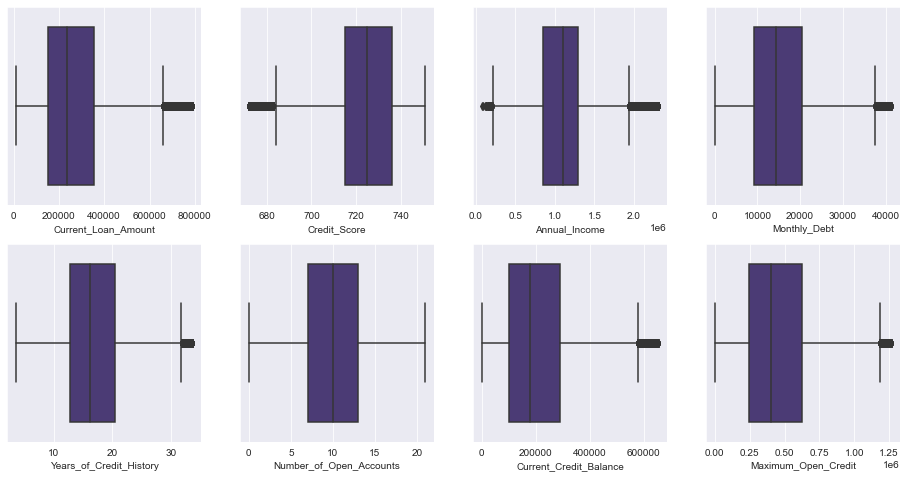

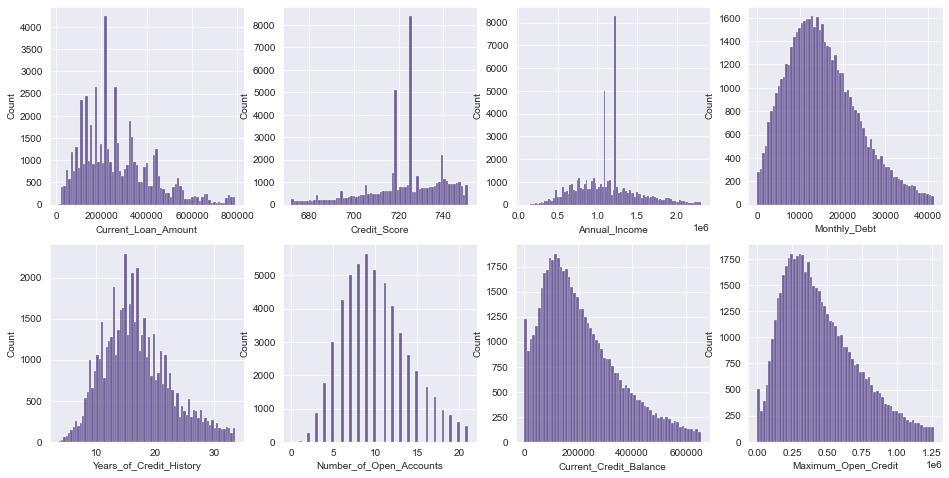

In [63]:
plt.figure(figsize=(16,8))
for i in range(1,9):
    plt.subplot(2,4,i)
    sns.boxplot(x = num_col[i-1], data = df2)
plt.show()

plt.figure(figsize=(16,8))
for i in range(1,9):
    plt.subplot(2,4,i)
    sns.histplot(x = num_col[i-1], data = df2)
plt.show()

#### Correlation and VIF

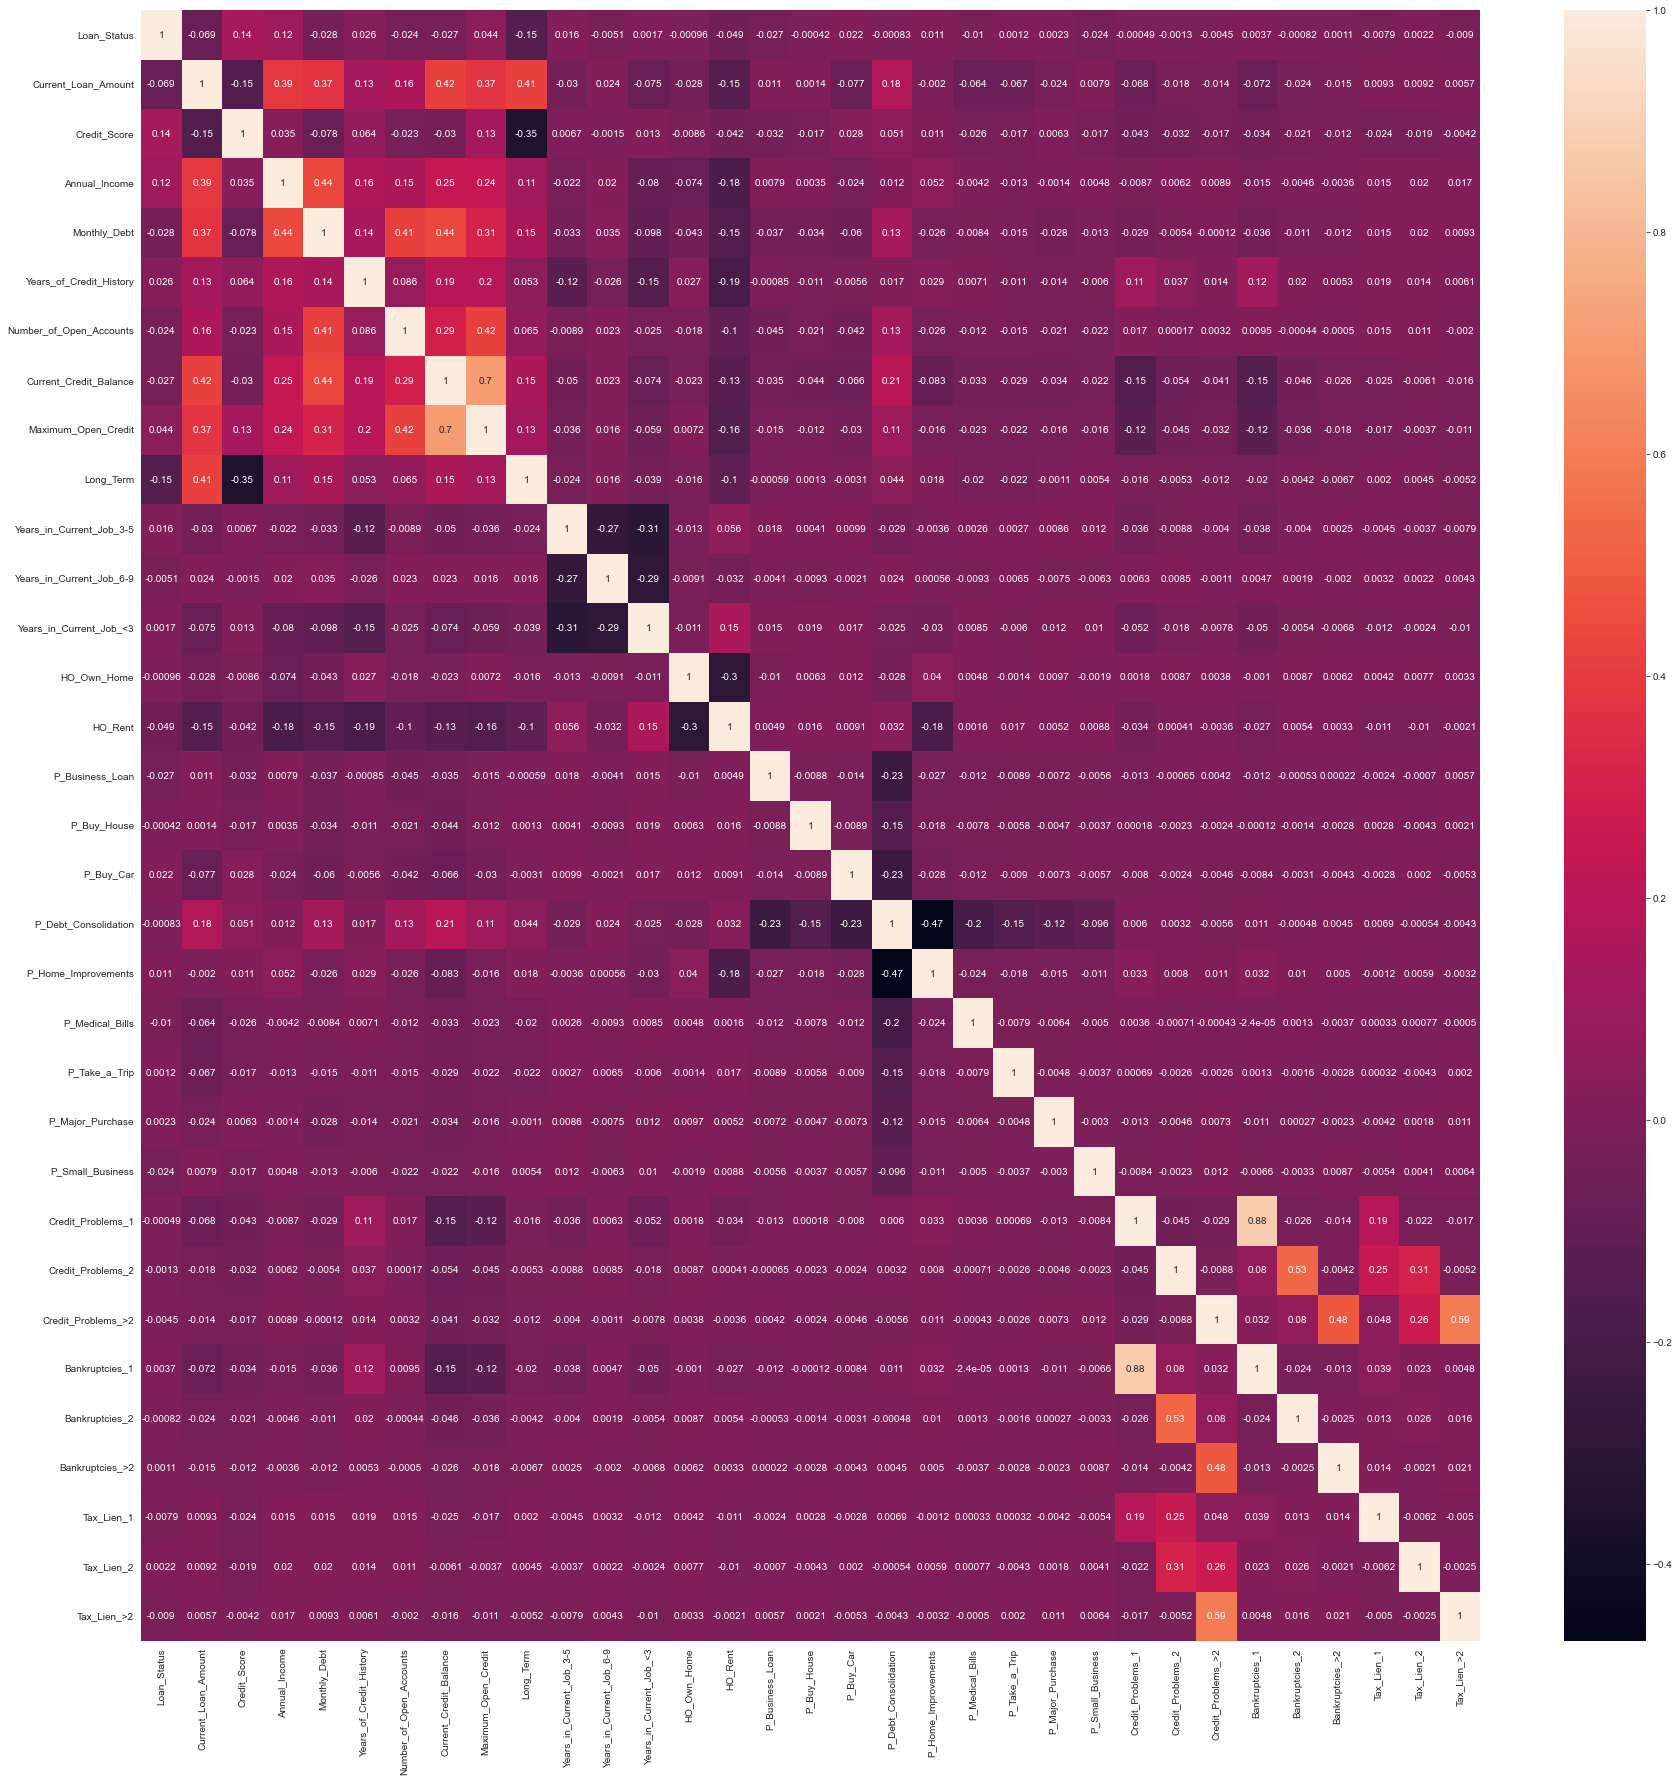

In [64]:
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [66]:
features = df2.drop(['Loan_Status'], axis = 1).columns.to_list()

In [67]:
def VIF(variables, data):
    x = data[variables]
    x = add_constant(x)
    vif = pd.DataFrame()
    vif['features'] = x.columns
        
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    vif = vif[vif['features']!='const']
    return vif

In [68]:
VIF(features, df2).sort_values('VIF', ascending=False)

,features,VIF
24,Credit_Problems_1,6.47
27,Bankruptcies_1,6.25
26,Credit_Problems_>2,3.48
8,Maximum_Open_Credit,2.49
25,Credit_Problems_2,2.47
7,Current_Credit_Balance,2.45
32,Tax_Lien_>2,2.14
18,P_Debt_Consolidation,2.05
29,Bankruptcies_>2,1.76
28,Bankruptcies_2,1.74


所有自變數的膨脹係數皆未高於10，故不須刪除變數。

In [69]:
df3 = df2.copy()

#### Modeling

In [70]:
pip install imblearm

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imblearm (from versions: none)
ERROR: No matching distribution found for imblearm


In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
X = df3.drop('Loan_Status', axis = 1)
y = df3['Loan_Status']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
print('X_train :', X_train.shape[0])
print('X_test :', X_test.shape[0])
print('y_train :', y_train.shape[0])
print('y_test :', X_test.shape[0])

X_train : 43224
X_test : 10807
y_train : 43224
y_test : 10807


In [76]:
scaler = StandardScaler() 

In [77]:
X_train_scaled = np.hstack((scaler.fit_transform(X_train[num_col]),np.array(X_train.drop(num_col, axis = 1))))

In [78]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.05,0.66,-0.06,-0.78,-0.47,0.73,0.54,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.34,-0.33,1.67,2.00,-0.68,-0.53,1.23,0.35,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.76,-0.91,2.21,0.47,-0.59,0.22,0.26,0.03,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,-0.83,1.01,0.49,1.06,-0.11,0.22,-0.57,-0.82,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-0.33,1.41,-0.26,-0.99,0.36,0.47,-0.14,0.45,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43219,-1.04,-0.62,-0.02,-0.55,-0.40,-0.53,-1.18,-1.29,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
43220,-1.31,-2.07,1.90,2.29,-0.77,0.73,-0.96,-1.13,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
43221,0.49,0.14,-0.43,0.40,-0.75,1.73,-0.21,0.49,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
43222,-1.18,-0.27,-1.45,-1.61,-2.09,-1.54,-0.96,-0.97,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [79]:
X_test_scaled = np.hstack((scaler.fit_transform(X_test[num_col]),np.array(X_test.drop(num_col, axis = 1))))

In [80]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.78,0.82,-0.16,0.63,0.51,0.72,2.59,1.91,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-0.86,0.41,1.60,1.60,2.12,-1.05,-0.55,-1.06,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-0.75,1.28,-1.94,-1.35,0.19,-1.56,-0.46,-0.86,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.77,0.93,0.99,0.56,-0.16,-0.04,0.03,-0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-0.47,0.93,-1.32,-1.07,0.91,-0.04,-0.09,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,-1.41,0.99,-0.97,-0.36,0.09,-0.80,-1.34,0.94,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10803,-0.38,-0.05,1.75,0.45,-0.50,-0.54,-0.64,-0.87,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10804,0.65,0.12,0.23,0.49,-0.07,0.47,-0.87,-1.22,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10805,-0.89,-0.28,-1.89,-0.51,-0.36,0.47,0.30,0.67,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


應變數的比例嚴重失衡，故採取SMOTE進行過採樣。

In [81]:
X_train_res, y_train_res = SMOTE().fit_resample(X_train_scaled, y_train)

我將使用羅吉斯迴歸、KNN及隨機森林，分別對未平衡與過採樣後的數據建模。

##### Logistic Regression

In [82]:
log_reg = LogisticRegression()

In [83]:
def log_model(train_x, train_y, test_x, test_y):
    log_reg.fit(train_x, train_y)
    
    print('score of train data :', log_reg.score(train_x, train_y))
    print('score of test data :', log_reg.score(test_x, test_y))
    print('-' * 50)
    
    y_pred = log_reg.predict(test_x)
    print('Classification Report :', '\n\n', classification_report(test_y, y_pred))
    print('-' * 50)
    
    print('Confusion Matrix :', '\n\n', confusion_matrix(test_y, y_pred))

In [84]:
print('[Logistic Regression with Resampling]', '\n\n')
log_model(X_train_res, y_train_res, X_test_scaled, y_test)

[Logistic Regression with Resampling] 


score of train data : 0.6161142971459056
score of test data : 0.6121957990191542
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.41      0.61      0.49      3295
           1       0.78      0.61      0.69      7512

    accuracy                           0.61     10807
   macro avg       0.60      0.61      0.59     10807
weighted avg       0.67      0.61      0.63     10807

--------------------------------------------------
Confusion Matrix : 

 [[2016 1279]
 [2912 4600]]


In [85]:
print('[Logistic Regression without Resampling]', '\n\n')
log_model(X_train_scaled, y_train, X_test_scaled, y_test)

[Logistic Regression without Resampling] 


score of train data : 0.7006986859152323
score of test data : 0.6986212639955585
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.53      0.12      0.19      3295
           1       0.71      0.95      0.81      7512

    accuracy                           0.70     10807
   macro avg       0.62      0.54      0.50     10807
weighted avg       0.65      0.70      0.62     10807

--------------------------------------------------
Confusion Matrix : 

 [[ 382 2913]
 [ 344 7168]]


##### KNN

In [86]:
def knn_model(train_x, train_y, test_x, test_y):
    KNN = KNeighborsClassifier(n_neighbors = 5)
    KNN.fit(train_x, train_y)
    
    print('score of train data :', KNN.score(train_x, train_y))
    print('score of test data :', KNN.score(test_x, test_y))
    print('-' * 50)
    
    y_pred = KNN.predict(test_x)
    print('Classification Report :', '\n\n', classification_report(test_y, y_pred))
    print('-' * 50)
    
    print('Confusion Matrix :', '\n\n', confusion_matrix(test_y, y_pred))

In [87]:
print('[KNN with Resampling]', '\n\n')
knn_model(X_train_res, y_train_res, X_test_scaled, y_test)

[KNN with Resampling] 


score of train data : 0.8261202987463323
score of test data : 0.5875821226982512
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.38      0.56      0.45      3295
           1       0.76      0.60      0.67      7512

    accuracy                           0.59     10807
   macro avg       0.57      0.58      0.56     10807
weighted avg       0.64      0.59      0.60     10807

--------------------------------------------------
Confusion Matrix : 

 [[1860 1435]
 [3022 4490]]


In [88]:
print('[KNN without Resampling]', '\n\n')
knn_model(X_train_scaled, y_train, X_test_scaled, y_test)

[KNN without Resampling] 


score of train data : 0.7756801776790672
score of test data : 0.6792819468862774
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.46      0.30      0.37      3295
           1       0.73      0.84      0.79      7512

    accuracy                           0.68     10807
   macro avg       0.60      0.57      0.58     10807
weighted avg       0.65      0.68      0.66     10807

--------------------------------------------------
Confusion Matrix : 

 [[ 997 2298]
 [1168 6344]]


##### Random Forest

In [89]:
def RF_model_res(train_x, train_y, test_x, test_y):
    rf = RandomForestClassifier(n_estimators = 250,
                                max_features = 'sqrt',
                                max_depth = 40,
                                random_state = 42)
    
    res_X, res_y = SMOTE().fit_resample(train_x, train_y)
    
    rf.fit(res_X, res_y)
    
    print('score of train data :', rf.score(train_x,train_y))
    print('score of test data :', rf.score(test_x,test_y))
    print('-'*50)
    
    y_pred = rf.predict(test_x)
    print('Classification Report :', '\n\n', classification_report(test_y,y_pred))
    print('-'*50)
    
    print('Confusion Matrix :', '\n\n', confusion_matrix(test_y, y_pred))

In [90]:
print('[Random Forest with Resampling]', '\n\n')
RF_model_res(X_train, y_train, X_test, y_test)

[Random Forest with Resampling] 


score of train data : 1.0
score of test data : 0.7335985935042102
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.58      0.44      0.50      3295
           1       0.78      0.86      0.82      7512

    accuracy                           0.73     10807
   macro avg       0.68      0.65      0.66     10807
weighted avg       0.72      0.73      0.72     10807

--------------------------------------------------
Confusion Matrix : 

 [[1458 1837]
 [1042 6470]]


In [91]:
def RF_model(train_x, train_y, test_x, test_y):
    rf = RandomForestClassifier(n_estimators = 200,
                                max_features = 'sqrt',
                                max_depth = 40,
                                random_state = 42)
    
    rf.fit(train_x, train_y)
    
    print('score of train data :', rf.score(train_x,train_y))
    print('score of test data :', rf.score(test_x,test_y))
    print('-'*50)
    
    y_pred = rf.predict(test_x)
    print('Classification Report :', '\n\n', classification_report(test_y,y_pred))
    print('-'*50)
    
    print('Confusion Matrix :', '\n\n', confusion_matrix(test_y, y_pred))

In [92]:
print('[Random Forest without Resampling]', '\n\n')
RF_model(X_train, y_train, X_test, y_test)

[Random Forest without Resampling] 


score of train data : 1.0
score of test data : 0.7737577496067364
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.31      0.46      3295
           1       0.76      0.98      0.86      7512

    accuracy                           0.77     10807
   macro avg       0.81      0.64      0.66     10807
weighted avg       0.79      0.77      0.73     10807

--------------------------------------------------
Confusion Matrix : 

 [[1021 2274]
 [ 171 7341]]


在三種方法中，隨機森林的表現最佳，且使用未重新採樣的數據建模有較高的精確度。